# Getting Started

In this guide, miidl is used to detect microbial biomarkers for the diagnosis of colorectal cancer.

---

## Step 1 Install Package

```
pip install miidl
```

<!-- or

```
conda install miidl -c bioconda
``` -->

---

## Step 2 Prepare Data 
Download data for the follow-up processing. 

We use a dataset of gut microbial mOTUs from 60 colorectal cancer (CRC) patients and 60 healthy controls (CTR), which is from a [published study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7984229/). Specifically, the "German (DE) study" in the paper.

```
wget https://github.com/chunribu/miidl/raw/main/test/CRC.tsv
```

---

## Step 3 Data Analysis
Open a Python3 interface and follow these steps:

+ Import a primary data container from the package.

In [1]:
from miidl import MData

+ Instantiate the object.
    <br>Read data file to the instance named "md".

In [2]:
md = MData()
md.read('CRC.tsv')

`CRC.tsv` is a `tab`-delimited text file. By default, the "Group" column in the file is auto-detected as labels for a supervised learning.

+ Perform quanlity control and discard features with an observation rate less than 0.25.

In [3]:
md.qc(obs=0.25)

Number of features: from 1484 to 396.



+ In this case, normalization and imputation are not applied.

In [4]:
# md.normalize(method='none')
# md.impute(method='none')

+ Reshape the dataset as a preparation for subsequent analysis.
**This step is always necessary.**

In [5]:
md.reshape()

+ Train a CNN model.

    In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs.

    `epochs` is set to be 50 in this example.


In [6]:
md.buildmodel(epochs=50)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=800, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=2, bias=True)
)
Using cpu device
Epoch 1
-------------------------------
loss: 0.699644  [    0/   84]
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.095453 

Epoch 2
-------------------------------
loss: 0.610368  [    0/   84]
Test Error: 
 Accuracy: 52.8%, Avg loss: 0.089143 

Epoch 3
---------------------

With an accuracy over 86%, the model fits well.<br>

+ Calculate importance values of all features (species) using the default algorithm "Integrated Gradients",

    where `method` can be one of: 
    [ IntegratedGradients, Saliency, DeepLift, DeepLiftShap, InputXGradient, GuidedBackprop, GuidedGradCam, Deconvolution, FeaturePermutation, KernelShap, LRP ],

    see [Captum](https://captum.ai/api/attribution.html) for detailed information about the algorithms.

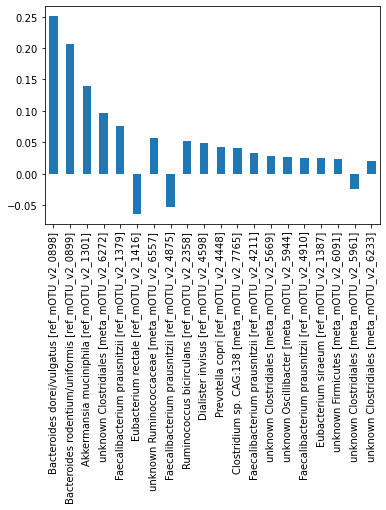

In [7]:
md.explain(target='CRC') # Contribution to the group/class CRC

Fig. 1 20 features with the biggest average importances<br><br>

+ Save results.

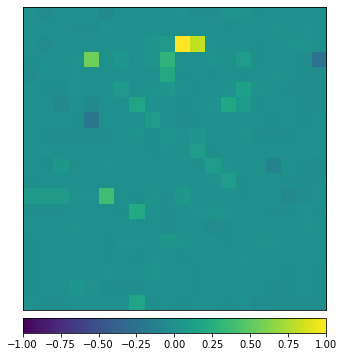

In [8]:
md.save()

Fig. 2 Importance values of all features<br><br>

---

## Step 4 Check Results
After all the steps above, there are 3 files generated under the working path:

- `FeatureImportance.tsv`: <br>
    A `tab`-delimited text file containing importance, each column represents a feature (species) and each row sample (observer).<br><br>

- `FeatureImportances.png` (Fig. 2) : <br>
    Importance values of features are plotted as a heatmap according to the order in `FeatureImportance.tsv` row by row.<br><br>

- `TOP20_KeyFeatures.png` (Fig. 1) : <br>
    Mean importance values are calculated and sorted. The 20 features with the largest absolute values are plotted in the bar chart.<br><br><br>
    

`___`


Tips: Since you are now more familiar with miidl, why not take a look at the properties and methods of `md` by simply enter `dir(md)` 🎃